maximum sentnce complexity comparison

In [1]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_lg")
import statistics
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import collections
from collections import Counter
import re
import language_tool_python  
from nltk.tokenize import sent_tokenize
import textstat
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import math
from nltk.sentiment import SentimentIntensityAnalyzer
import language_tool_python

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
def walk_tree1(node, depth):
    if node.n_lefts + node.n_rights > 0:
        dep=[]
        d=0
        for child in node.children:
            d=walk_tree1(child, depth + 1)
            dep.append(d)
        return max(dep)
    
    else:
        return depth
    
def avg_sentence_complexity(str1):
    final_list=[]
    nlp = spacy.load("en_core_web_lg")
    temp_list=[]
    sents=[]
    txt = str1
    txt=" ".join(txt.split())
    text = nlp(txt)
    sent_tokenize1 = (list(text.sents))
    sents.append(sent_tokenize1[0])
    i=0
    for sent in text.sents:
        d=walk_tree1(sent.root, 0)
        temp_list.append(d)
            #displacy.render(sent, style="dep")
        final_list.append(temp_list)
        #print("essay first line ",sents[len(sents)-1],"max is ",max(temp_list)," min is ",min(temp_list)," mean is ", round(statistics.mean(temp_list),3),
        #  " median is ",statistics.median(temp_list)," mode is ",statistics.mode(temp_list))
        #print(i, temp_list)
        #i+=1
    #print(final_list,len(final_list))
    #return round(statistics.mean(temp_list),3)
    return max(temp_list)

In [4]:
df1 = pd.read_csv('../csv/gpt/csv_gpt3-2.csv')
df2 = pd.read_csv('../csv/human/csv_human-2.csv')
ess1=df1.loc[:,'essay']
ess2=df2.loc[:,'essay']

In [5]:
msc1=[]
msc2=[]

In [3]:
msc1=[]
msc2=[]

In [35]:
del msc1[:2]

In [ ]:
msc1

In [37]:
len(msc1)

150

In [ ]:
for i in range(len(ess1)):
    m1=avg_sentence_complexity(ess1[i])
    print(m1)
    msc1.append(m1)
    m2=avg_sentence_complexity(ess2[i])
    msc2.append(m2)
    print(m2)

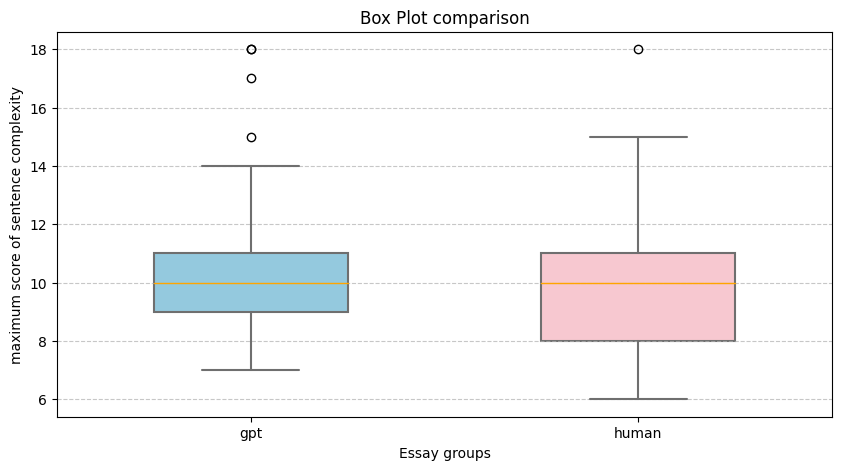

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the data into a single DataFrame (optional but can be helpful for labeling)
import pandas as pd

data1 = pd.DataFrame({'gpt': msc1, 'human': msc2})

# Create the box plot with custom colors
colors = ["skyblue", "pink"]
medianprops = {'color': 'orange', 'linewidth': 1}
flierprops = {'marker': 'o', 'markerfacecolor': 'none', 'markeredgecolor': 'black', 'markersize': 6}

plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
sns.boxplot(data=data1, palette=colors, width=0.5, medianprops=medianprops, flierprops=flierprops)

plt.xlabel("Essay groups")
plt.ylabel("maximum score of sentence complexity")
plt.title("Box Plot comparison")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Customize the background color
#ax = plt.gca()
#ax.set_facecolor("#f0f0f0")
plt.show()